https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-performance/nircam-point-spread-functions

In [1]:
import numpy as np
from glob import glob
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches
# non-interactive (easier for notebook scrolling)
%matplotlib inline
#%matplotlib notebook
#plt.style.use(os.path.join(home, 'p', 'matplotlibrc.txt')) # https://matplotlib.org/tutorials/introductory/customizing.html
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt') # https://matplotlib.org/tutorials/introductory/customizing.html
mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import astropy
import astropy.io
import astropy.io.ascii
import astropy.units as u

In [4]:
#cmap = matplotlib.cm.get_cmap("rainbow")
cmap = matplotlib.pyplot.get_cmap("rainbow")

def get_filt_color(filt):
    lam = extract_lam(filt).value
    x = np.interp(lam, (0.5, 5), (0, 1))
    color = np.array(cmap(x))[:-1]
    return color

In [5]:
def extract_lam(filt):
    lam = int(filt[1:4])/100.
    return lam * u.um

# Encircled Energy

https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-performance/nircam-point-spread-functions

In [6]:
# filename says LW, but it actually has both SW and LW
EE_file = 'https://jwst-docs.stsci.edu/files/97978351/182257576/1/1669655270449/Encircled_Energy_LW_ETCv2.txt'
encircled_energy = astropy.io.ascii.read(EE_file)
encircled_energy

aper_radius,F070W,F090W,F115W,F140M,F150W2,F150W,F162M,F164N,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F322W2,F323N,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.01,0.221,0.175,0.137,0.099,0.09,0.094,0.077,0.075,0.062,0.06,0.055,0.049,0.047,0.057,0.049,0.041,0.041,0.033,0.032,0.03,0.028,0.022,0.022,0.02,0.02,0.018,0.017,0.017,0.016
0.02,0.423,0.414,0.376,0.3,0.277,0.279,0.246,0.241,0.204,0.198,0.184,0.165,0.161,0.13,0.112,0.094,0.094,0.078,0.075,0.069,0.066,0.053,0.053,0.048,0.047,0.042,0.041,0.04,0.039
0.03,0.493,0.537,0.559,0.496,0.469,0.456,0.431,0.425,0.371,0.362,0.339,0.309,0.302,0.225,0.196,0.166,0.164,0.138,0.134,0.123,0.117,0.095,0.094,0.086,0.085,0.075,0.074,0.073,0.07
0.04,0.553,0.565,0.616,0.606,0.591,0.562,0.566,0.562,0.514,0.505,0.48,0.449,0.441,0.372,0.332,0.289,0.285,0.247,0.241,0.224,0.214,0.178,0.177,0.163,0.16,0.143,0.141,0.139,0.133
0.05,0.614,0.613,0.629,0.64,0.639,0.616,0.634,0.633,0.607,0.602,0.582,0.558,0.552,0.506,0.459,0.409,0.401,0.354,0.347,0.324,0.311,0.262,0.261,0.242,0.237,0.213,0.211,0.207,0.2
0.06,0.658,0.674,0.664,0.649,0.652,0.653,0.656,0.657,0.655,0.655,0.645,0.634,0.631,0.583,0.54,0.493,0.481,0.434,0.428,0.403,0.389,0.333,0.332,0.309,0.304,0.275,0.273,0.268,0.259
0.07,0.686,0.709,0.71,0.668,0.664,0.678,0.66,0.66,0.666,0.667,0.665,0.664,0.663,0.634,0.601,0.562,0.548,0.506,0.503,0.478,0.464,0.407,0.404,0.38,0.374,0.343,0.34,0.334,0.323
0.08,0.702,0.732,0.747,0.711,0.697,0.704,0.679,0.677,0.67,0.669,0.67,0.67,0.67,0.669,0.648,0.622,0.605,0.571,0.571,0.547,0.535,0.479,0.476,0.451,0.444,0.411,0.408,0.402,0.39
0.09,0.717,0.746,0.766,0.752,0.736,0.727,0.713,0.709,0.685,0.681,0.678,0.673,0.672,0.677,0.667,0.651,0.636,0.61,0.615,0.595,0.586,0.536,0.534,0.51,0.502,0.471,0.468,0.461,0.449


In [7]:
#encircled_energy_SW = astropy.io.ascii.read('Encircled_Energy_SW.txt', header_start=3)
#encircled_energy_LW = astropy.io.ascii.read('Encircled_Energy_LW.txt', header_start=3)

#encircled_energy = encircled_energy_SW[:]
#for label in encircled_energy_LW.columns:
#    encircled_energy[label] = encircled_energy_LW[label]

#encircled_energy

In [8]:
filters = 'F090W F115W F150W F200W F277W F356W F410M F444W'.split()

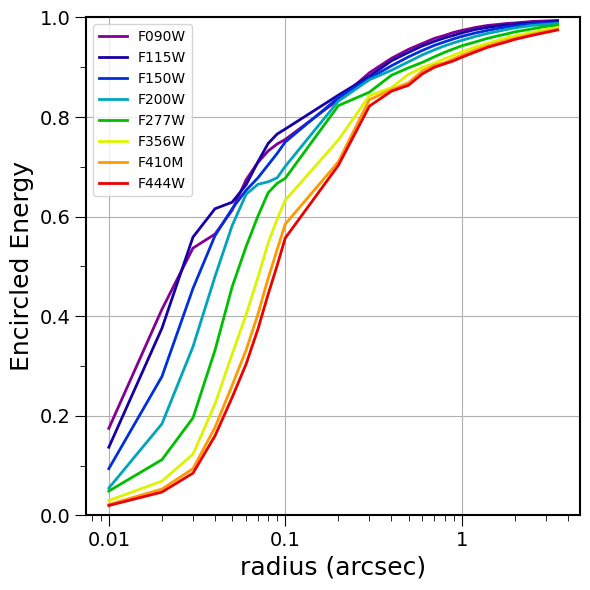

In [9]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

cmap = matplotlib.pyplot.get_cmap("nipy_spectral")  # rainbow

for filt in filters:
    color = get_filt_color(filt)
    plt.plot(encircled_energy['aper_radius'], encircled_energy[filt], color=color, label=filt)

plt.xlabel('radius (arcsec)')
plt.ylabel('Encircled Energy')
#plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.legend()
plt.semilogx()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

plt.grid()
plt.savefig('NIRCam_encircled_energy.png')

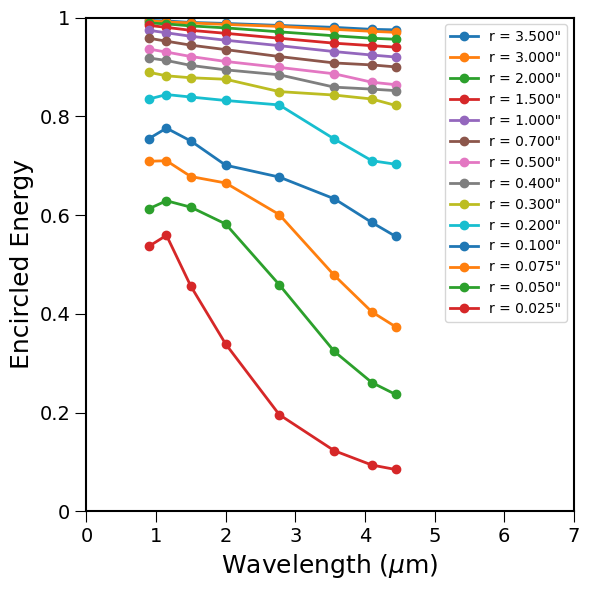

In [10]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

#rr = 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3.5
rr = encircled_energy['aper_radius']
rr = 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 1.5, 2, 3, 3.5

for rarcsec in rr[::-1]:
    i_ee = np.argmin(np.abs(encircled_energy['aper_radius'] - rarcsec))
    label = 'r = %.3f"' % rarcsec

    ees = []
    lams = []
    for filt in filters:
        ees.append(encircled_energy[filt.upper()][i_ee])
        lams.append(extract_lam(filt).value)

    plt.plot(lams, ees, '-o', label=label)
        
plt.xlim(0,7)
plt.ylim(0,1)
#plt.semilogy()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Encircled Energy')
plt.legend()
plt.savefig('NIRCam_encircled_energy_8filters.png')

In [11]:
aperture_radius = 0.3
i_ee = np.argmin(np.abs(encircled_energy['aper_radius'] - aperture_radius))
print('r = %g"' % encircled_energy['aper_radius'][i_ee])
for filt in filters:
    ee = encircled_energy[filt.upper()][i_ee]
    dmag = 2.5 * np.log10(ee)
    print(filt, ' %.3f' % ee, ' %5.3f' % dmag)

r = 0.3"
F090W  0.889  -0.128
F115W  0.882  -0.136
F150W  0.878  -0.141
F200W  0.875  -0.145
F277W  0.850  -0.176
F356W  0.843  -0.185
F410M  0.835  -0.196
F444W  0.822  -0.213


# Ensquared energy

In [ ]:
ensquared_energy_SW = astropy.io.ascii.read('Ensquared_Energy_SW.txt', header_start=4)
ensquared_energy_LW = astropy.io.ascii.read('Ensquared_Energy_LW.txt', header_start=4)

ensquared_energy = ensquared_energy_SW[:]
for label in ensquared_energy_LW.columns:
    ensquared_energy[label] = ensquared_energy_LW[label]

ensquared_energy['pixels_on_a_side'] = np.zeros(len(ensquared_energy)).astype(int)
for i in range(len(ensquared_energy)):
    ensquared_energy['pixels_on_a_side'][i] = int(ensquared_energy['aperture_size'][i].split('x')[0])

#ensquared_energy.columns = list(ensquared_energy.columns[-1:]) + list(ensquared_energy.columns[:-1])
ensquared_energy

In [ ]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

cmap = matplotlib.cm.get_cmap("nipy_spectral")  # rainbow

for filt in filters:
    color = get_filt_color(filt)
    plt.plot(ensquared_energy['pixels_on_a_side'], ensquared_energy[filt], color=color, label=filt)

plt.xlabel('pixels on a side')
plt.ylabel('Ensquared Energy')
#plt.xlim(0,1)  # 3.5
plt.semilogx()
plt.ylim(0,1)
plt.legend()
plt.grid()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
#ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

#plt.savefig('NIRCam_ensquared_energy_vs_size.png')

In [ ]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # , sharex=True, sharey=True)

pp = ensquared_energy['pixels_on_a_side'][::-1]

for pixels_on_a_side in pp:
    i_ee = np.argmin(np.abs(ensquared_energy['pixels_on_a_side'] - pixels_on_a_side))
    label = '%d pixels on a side' % pixels_on_a_side

    ees = []
    lams = []
    for filt in filters:
        ees.append(ensquared_energy[filt.upper()][i_ee])
        lams.append(extract_lam(filt).value)

    plt.plot(lams, ees, '-o', label=label)
        
plt.xlim(0.5,6.5)
plt.ylim(0,1)
#plt.semilogy()
#plt.ylim(0.47, 1)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Ensquared Energy')
plt.legend()
#plt.savefig('NIRCam_ensquared_energy_8filters.png')

In [ ]:
pixels_on_a_side = 5
i_ee = np.argmin(np.abs(ensquared_energy['pixels_on_a_side'] - pixels_on_a_side))
for filt in filters:
    ee = ensquared_energy[filt.upper()][i_ee]
    dmag = 2.5 * np.log10(ee)
    print(filt, ' %.3f' % ee, ' %5.3f' % dmag)